Integration of the diff. equation of the BEC using rk4
\begin{equation}
    \left( \frac{\partial{2}}{\partial r^{2}} + k^{2} + V(r) -\frac{l(l+1)}{r^{2}} \right)u_{l}(r) = 0
\end{equation}

In [1]:
import numpy as np
import matplotlib.pyplot as plt

R = 10

h = 0.01     # Integration Lenght Step

def Potential(V_0, r): #Potencial definition
    if abs(r) < R:
        return V_0
    else:
        return 0

# Differential Equation
def f(r, u, v, l, k, V_0):
    du_dr = v
    dv_dr = -(k**2 + Potential(V_0, r) - l*(l + 1)/r**2) * u
    return np.array([du_dr, dv_dr])

# RK4 integration method
def rk4_step(f, r, u, v, h, l, k, V_0):
    k1 = h * f(r, u, v, l, k, V_0)
    k2 = h * f(r + 0.5*h, u + 0.5*k1[0], v + 0.5*k1[1], l, k, V_0)
    k3 = h * f(r + 0.5*h, u + 0.5*k2[0], v + 0.5*k2[1], l, k, V_0)
    k4 = h * f(r + h, u + k3[0], v + k3[1], l, k, V_0)
    u_next = u + (k1[0] + 2*k2[0] + 2*k3[0] + k4[0]) / 6.0
    v_next = v + (k1[1] + 2*k2[1] + 2*k3[1] + k4[1]) / 6.0
    return u_next, v_next

#Simulation of u(r)
def simulation(k, V_0, l, ax, r_min = -150.0, r_max = 150.0):
    
    # List to save the data
    r_values = np.arange(r_min, r_max, h)
    r_values_2 = []
    u_values = []
    v_values = []

    # Initial conditions
    u = 0.0
    v = 1.0

    # Numerical integration using RK4
    for r in r_values:
        if r > R:
            r_values_2.append(r)
            u_values.append(u)
            v_values.append(v)
        u, v = rk4_step(f, r, u, v, h, l, k, V_0)

    u_values = np.array(u_values)
    u_values = u_values / np.max(np.abs(u_values))

    # Plotting the solution
    if V_0 == 0:
        label = r'u$_0$(r)'
    else:
        label = r'u(r)'
    ax.plot(r_values_2, u_values, label=label, lw = 6)


The graphs shows the behavior of the wave for different values of $l$, for the cases $kR\ll1$ and when $kR\not\ll1$. See the pdf for a extended explication.

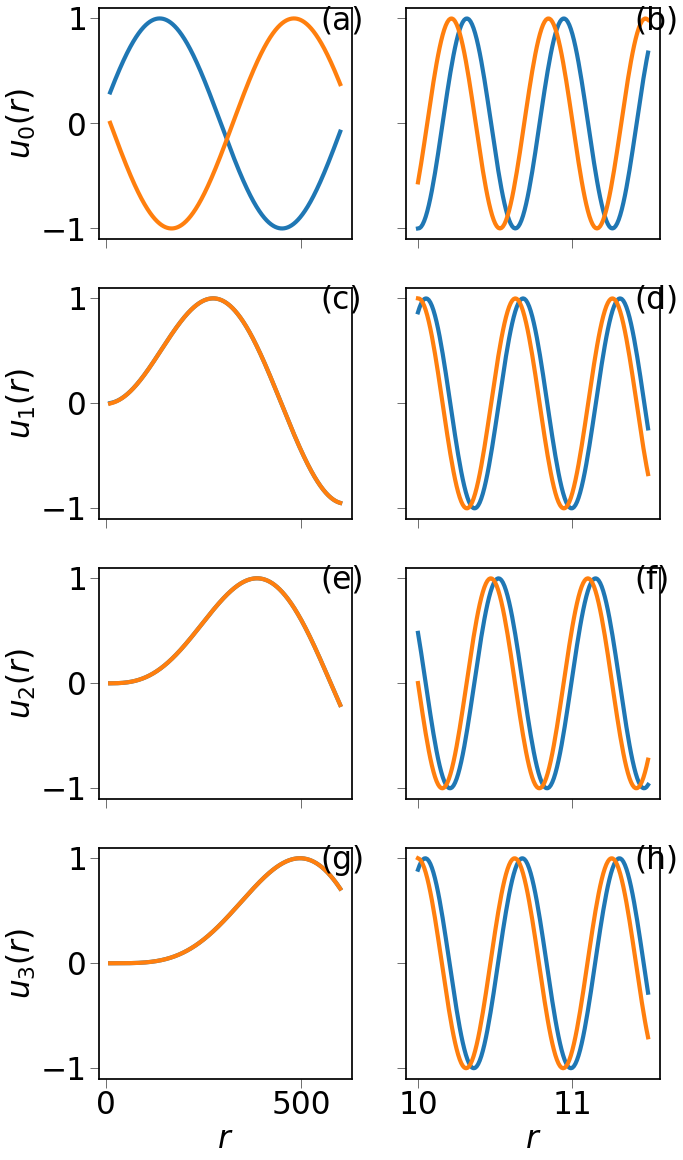

In [4]:
#Configuration of the display and style of the graph

plt.rcParams.update({
            "font.size": 45
        })


dpi = 50
fig,axs = plt.subplots(4, 2, figsize=(740/dpi,1220/dpi), dpi=dpi, sharex='col', sharey=True)

for i in range(len(axs)):
    for j in range(len(axs[0])):
        axs[i,j].tick_params(which='major', length=13, color='black')
        axs[i,j].tick_params(which='minor', length=7, color='black', width=1)
        axs[i,j].tick_params(which='major', length=13, color='black')
        axs[i,j].tick_params(which='minor', length=7, color='black', width=1)
        axs[i,j].tick_params(which='major', length=13, color='black')
        axs[i,j].tick_params(which='minor', length=7, color='black', width=1)
        for axis in ['bottom','left','top','right']:
            axs[i,j].spines[axis].set_linewidth(2.5)
            axs[i,j].spines[axis].set_linewidth(2.5)
            axs[i,j].spines[axis].set_linewidth(2.5)
            axs[i,j].spines[axis].set_linewidth(2.5)


#Cases when kr is not << 1
for i in [i for i in range(4)]: #Iterating over the values of l
    simulation(k = 10, V_0 = 0, l = i, ax = axs[i,1], r_min=-20, r_max=11.5)
    simulation(k = 10, V_0 = 1, l = i, ax = axs[i,1], r_min=-20, r_max=11.5)
    label = ['b', 'd', 'f', 'h']
    axs[i,1].text(11.4, 0.9, rf'({label[i]})')

#Cases when kr << 1
for i in [i for i in range(4)]: #Iterating over the values of l
    simulation(k = 0.01, V_0 = 0, l = i, ax = axs[i,0], r_min=-20, r_max=600.5)
    simulation(k = 0.01, V_0 = 1, l = i, ax = axs[i,0], r_min=-20, r_max=600.5)
    axs[i,0].set_ylabel(rf'$u_{i}(r)$')
    label = ['a', 'c', 'e', 'g']
    axs[i,0].text(550, 0.9, rf'({label[i]})')

axs[3, 0].set_xlabel(r"$r$")
axs[3, 1].set_xlabel(r"$r$")
plt.tight_layout()
plt.savefig('BEC.pdf', format = 'pdf')
plt.show()